In [28]:
import pandas as pd
from tensorflow import keras as k
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def normalize(x):
    avg = np.mean(x, axis = 0)
    std = np.std(x,axis = 0)
    return (x-avg)/std

In [30]:
data = np.array(pd.read_csv("data.csv",header = None))
x_train = normalize(data[:,0])
y_train = normalize(data[:,1])
print(x_train.shape)

(100,)


In [31]:
model = k.models.Sequential()

In [32]:
model.add(k.layers.Dense(input_dim=1, units=1))

In [39]:
model.compile(loss='mse', optimizer='Adam')

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [41]:
for iteration in range(1000):
    cost = model.train_on_batch(x_train, y_train)
    if iteration % 100 ==0:
        print("After %d iterations, the cost: %g" %(iteration,cost))  

After 0 iterations, the cost: 0.401344
After 100 iterations, the cost: 0.401344
After 200 iterations, the cost: 0.401344
After 300 iterations, the cost: 0.401344
After 400 iterations, the cost: 0.401344
After 500 iterations, the cost: 0.401344
After 600 iterations, the cost: 0.401344
After 700 iterations, the cost: 0.401344
After 800 iterations, the cost: 0.401344
After 900 iterations, the cost: 0.401344


In [42]:
W, B = model.layers[0].get_weights()
print("Weight: %g, Bias: %g"%(W,B))

Weight: 0.773729, Bias: -1.2953e-05


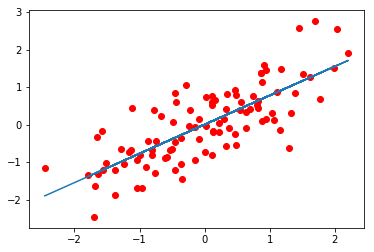

In [43]:
plt.scatter(x_train,y_train,c = 'r')
plt.plot(x_train,(W*x_train+B)[0])
plt.show()